In [ ]:
#catatan : TensorFlow adalah librabry ML untuk skala besar. bisa dijalankan pada paralel dengan menggunakan CPU dan GPU
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.2.0


In [3]:
!wget --no-check-certificate \
  http://download1500.mediafire.com/0v01j75nazog/px7tnz75fgo2ank/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-19 05:57:59--  http://download1500.mediafire.com/0v01j75nazog/px7tnz75fgo2ank/rockpaperscissors.zip
Resolving download1500.mediafire.com (download1500.mediafire.com)... 205.196.123.188
Connecting to download1500.mediafire.com (download1500.mediafire.com)|205.196.123.188|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.mediafire.com/download_repair.php?flag=4&dkey=0v01j75nazo&qkey=px7tnz75fgo2ank&ip=35.237.10.225&ref=3 [following]
--2020-06-19 05:57:59--  http://www.mediafire.com/download_repair.php?flag=4&dkey=0v01j75nazo&qkey=px7tnz75fgo2ank&ip=35.237.10.225&ref=3
Resolving www.mediafire.com (www.mediafire.com)... 104.16.202.237, 104.16.203.237
Connecting to www.mediafire.com (www.mediafire.com)|104.16.202.237|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss     [ <=>                ]  30.00K  --.-KB/s    in 0.01s   

2020-06-19

In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
lokasi_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(lokasi_zip, 'r')
zip_ref.extractall('/tmp/batuguntingkertas')
zip_ref.close()

base_dir = '/tmp/batuguntingkertas'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

BadZipFile: ignored

In [ ]:
os.listdir('/tmp/batuguntingkertas/train')
os.listdir('/tmp/batuguntingkertas/val')

['scissors', 'paper', 'rock']

In [ ]:
# membuat direktori untuk rock
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori untuk paper
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori untuk scissors
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat test direktori untuk rock
test_rock_dir = os.path.join(validation_dir, 'rock')

# membuat test direktori untuk paper
test_paper_dir = os.path.join(validation_dir, 'paper')

# membuat test direktori untuk scissors
test_scissors_dir = os.path.join(validation_dir, 'scissors')


In [ ]:
train_dg = ImageDataGenerator(
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    data_format='channels_last',
                    rescale= 0.25,
                    horizontal_flip=True,
                    vertical_flip=True,
                    validation_split=0.5)
 
test_dg = ImageDataGenerator(
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    data_format='channels_last',
                    rescale= 0.25,
                    horizontal_flip=True,
                    vertical_flip=True,
                    validation_split=0.5)

In [ ]:
train_gen= train_dg.flow_from_directory(
        train_dir,  
        target_size=(300, 200),  
        batch_size=10,
        class_mode='categorical'
        )
 
validation_gen = test_dg.flow_from_directory(
        validation_dir, 
        target_size=(300, 200), 
        batch_size=10, 
        class_mode='categorical'
        )
print(train_gen.labels.size)

Found 1710 images belonging to 3 classes.
Found 478 images belonging to 3 classes.
1710


In [ ]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,200,3),name='input_layer'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', name='hidden1'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='hidden2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', name='hidden3'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax, name='output')
])

# model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


Epoch 1/20
25/25 - 33s - loss: 8.3472 - accuracy: 0.3800 - val_loss: 0.9725 - val_accuracy: 0.5400
Epoch 2/20
25/25 - 32s - loss: 0.9468 - accuracy: 0.5600 - val_loss: 0.6180 - val_accuracy: 0.8600
Epoch 3/20
25/25 - 32s - loss: 0.7996 - accuracy: 0.6760 - val_loss: 0.6768 - val_accuracy: 0.8200
Epoch 4/20
25/25 - 33s - loss: 0.6023 - accuracy: 0.8120 - val_loss: 0.5880 - val_accuracy: 0.7800
Epoch 5/20
25/25 - 32s - loss: 0.6029 - accuracy: 0.7880 - val_loss: 0.4869 - val_accuracy: 0.7800
Epoch 6/20
25/25 - 32s - loss: 0.5435 - accuracy: 0.8040 - val_loss: 0.7432 - val_accuracy: 0.7600
Epoch 7/20
25/25 - 32s - loss: 0.4094 - accuracy: 0.8440 - val_loss: 0.3576 - val_accuracy: 0.8600
Epoch 8/20
25/25 - 32s - loss: 0.4021 - accuracy: 0.8760 - val_loss: 0.3690 - val_accuracy: 0.8600
Epoch 9/20
25/25 - 32s - loss: 0.2617 - accuracy: 0.9000 - val_loss: 0.1149 - val_accuracy: 0.9600
Epoch 10/20
25/25 - 32s - loss: 0.3451 - accuracy: 0.8840 - val_loss: 0.6213 - val_accuracy: 0.7600
Epoch 11/

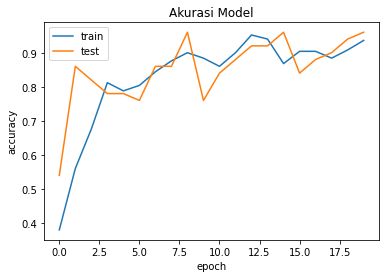

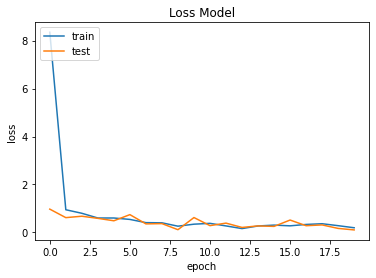

In [ ]:
import matplotlib.pyplot as pltModel

riwayat = model.fit(
      train_gen,
      steps_per_epoch=25, 
      epochs=20,
      validation_data=validation_gen, 
      validation_steps=5,  
      verbose=2)

pltModel.plot(riwayat.history['accuracy'])
pltModel.plot(riwayat.history['val_accuracy'])
pltModel.title('Akurasi Model')
pltModel.ylabel('accuracy')
pltModel.xlabel('epoch')
pltModel.legend(['train', 'test'], loc='upper left')
pltModel.show()

pltModel.plot(riwayat.history['loss'])
pltModel.plot(riwayat.history['val_loss'])
pltModel.title('Loss Model')
pltModel.ylabel('loss')
pltModel.xlabel('epoch')
pltModel.legend(['train', 'test'], loc='upper left')
pltModel.show()

Saving 0zoQAmDFXehOZsAp.png to 0zoQAmDFXehOZsAp.png
0zoQAmDFXehOZsAp.png
[[1.0577499e-09 2.8723340e-25 1.0000000e+00]]
scisorss


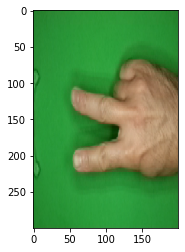

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for gambar in uploaded.keys():
 
  # predicting images
  path = gambar
  img = image.load_img(path, target_size=(300,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(gambar)
  print(classes)
  hasil = max(classes[0])
  if classes[0][0]==hasil:
    print('paper')
  elif classes[0][1]==hasil:
    print('rock')
  else:
   print('scisorss')